In [1]:
 # フォントを全て読み込み
import matplotlib.pyplot as plt
import japanize_matplotlib

fonts = set([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rcParams['font.family'] = "MS Gothic"

In [2]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import statsmodels.api as sm
import datetime
from statsmodels.stats.stattools import jarque_bera
pd.options.display.precision = 3
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
end=datetime.datetime.now() #'2022/12/31'
n225 = web.DataReader("NIKKEI225", 'fred',"1949/5/16",end).dropna()
lnn225=np.log(n225.copy()).dropna()
lnn225.columns=['Close']

In [4]:
factors=["標本の大きさ","切片","傾き",
         "対数リターン","ボラ","残差STD","残差範囲"]
states=['戦後復興期','高度経済成長期','安定成長期','バブル期',
        'バブルピークまで','バブル暴落','調整期','アベノミクス']
starts=["1949/5/16","1954/12/1",'1972/1/1',"1986/12/1","1986/12/1","1990/1/1",
        "1993/11/1", "2012/11/1"]
ends=["1954/11/30",'1971/12/31',"1986/11/30","1993/10/31","1989/12/31",
      "1992/8/31", "2012/10/31",end]
econ=pd.DataFrame(np.array([starts,ends]).T,index=states,
                  columns=['始点','終点'])

In [5]:
print("表6.1:景気循環期の始点と終点")
econ

表6.1:景気循環期の始点と終点


,始点,終点
戦後復興期,1949/5/16,1954/11/30
高度経済成長期,1954/12/1,1971/12/31
安定成長期,1972/1/1,1986/11/30
バブル期,1986/12/1,1993/10/31
バブルピークまで,1986/12/1,1989/12/31
バブル暴落,1990/1/1,1992/8/31
調整期,1993/11/1,2012/10/31
アベノミクス,2012/11/1,2025-11-19 10:37:23.374398


In [6]:
def timetrend(y):
    x = range(len(y))
    x0 = sm.add_constant(x)
    return sm.OLS(y, x0).fit()

In [7]:
def OLS_timetrend(tsd, title1, title2):
    fig = plt.figure(figsize=(7,3)) 

    # できれば Series を渡した方がきれい
    results = timetrend(tsd.Close)

    summary = [
        len(tsd),
        results.params.iloc[0],  # ← const
        results.params.iloc[1],  # ← 傾き
        tsd.Close.diff().dropna().mean() * 240,
        np.sqrt(tsd.Close.diff().dropna().var() * 240),
        np.std(results.resid),
        max(results.resid) - min(results.resid),
    ]

    plt.subplot(1, 2, 1, ylabel='価格の対数', title=title1)
    plt.plot(tsd.index, results.fittedvalues, label="予測値")
    plt.plot(tsd.index, tsd, label="観測値")
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()

    plt.subplot(1, 2, 2, ylabel='残差', title=title2)
    plt.plot(results.resid, color="seagreen")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    return summary

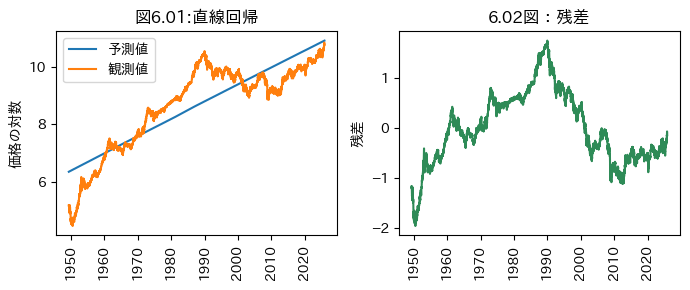

,標本の大きさ,切片,傾き,対数リターン,ボラ,残差STD,残差範囲
全期間,19000.0000,6.3447,0.0002,0.0710,0.1924,0.7206,3.7294


In [8]:
results=OLS_timetrend(lnn225,"図6.01:直線回帰","6.02図：残差")
summary=pd.DataFrame([np.array(results).T],columns=factors,index=["全期間"])
summary

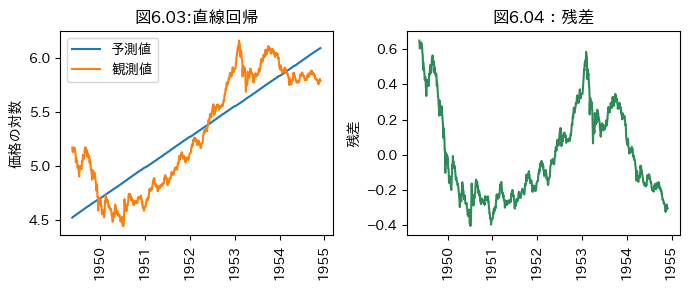

In [9]:
tsd=lnn225.loc[:ends[0]].dropna()
results=OLS_timetrend(tsd,"図6.03:直線回帰","図6.04：残差")
summary.loc[econ.index[0]]=np.array(results).T

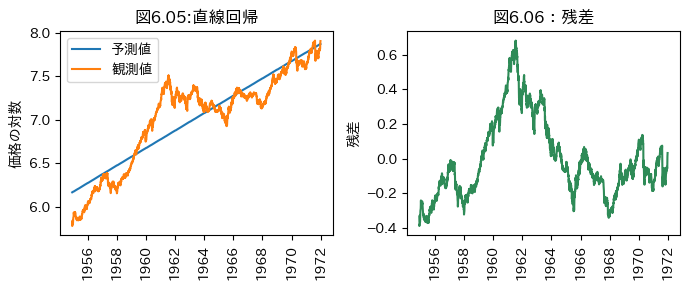

In [10]:
tsd=lnn225.loc[starts[1]:ends[1]].dropna()
results=OLS_timetrend(tsd,"図6.05:直線回帰","図6.06：残差")
summary.loc[econ.index[1]]=np.array(results).T

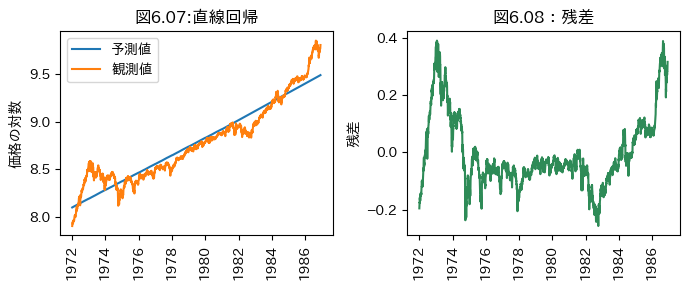

In [11]:
tsd=lnn225.loc[starts[2]:ends[2]].dropna()
results=OLS_timetrend(tsd,"図6.07:直線回帰","図6.08：残差")
summary.loc[econ.index[2]]=np.array(results).T

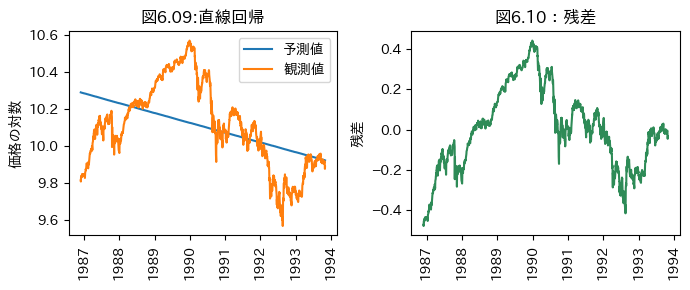

In [12]:
tsd=lnn225.loc[starts[3]:ends[3]].dropna()
results=OLS_timetrend(tsd,"図6.09:直線回帰","図6.10：残差")
summary.loc[econ.index[3]]=np.array(results).T

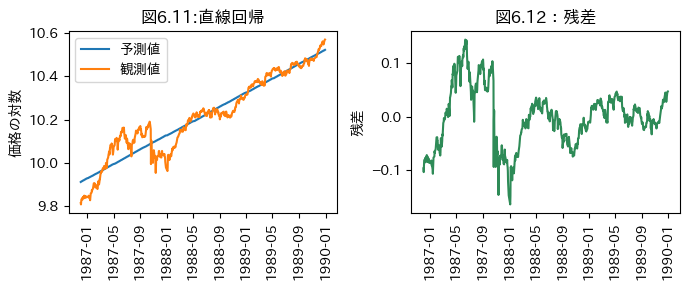

In [13]:
tsd=lnn225.loc[starts[4]:ends[4]].dropna()
results=OLS_timetrend(tsd,"図6.11:直線回帰","図6.12：残差")
summary.loc[econ.index[4]]=np.array(results).T

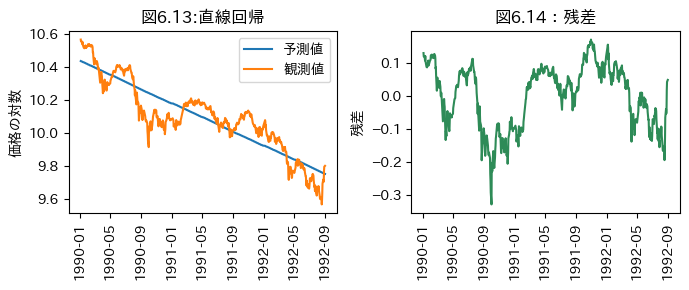

In [14]:
tsd=lnn225.loc[starts[5]:ends[5]].dropna()
results=OLS_timetrend(tsd,"図6.13:直線回帰","図6.14：残差")
summary.loc[econ.index[5]]=np.array(results).T

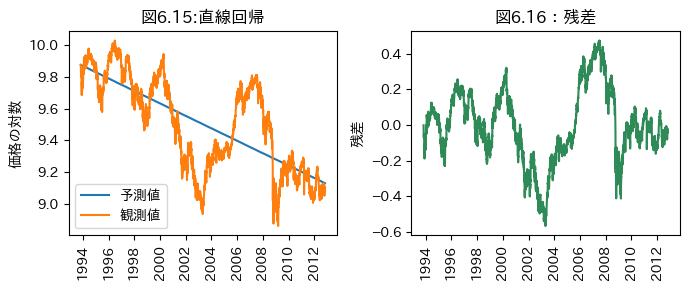

In [15]:
tsd=lnn225.loc[starts[6]:ends[6]].dropna()
results=OLS_timetrend(tsd,"図6.15:直線回帰","図6.16：残差")
summary.loc[econ.index[6]]=np.array(results).T

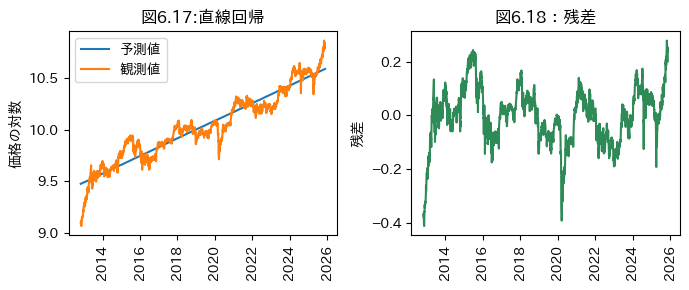

In [16]:
tsd=lnn225.loc[starts[7]:ends[7]].dropna()
results=OLS_timetrend(tsd,"図6.17:直線回帰","図6.18：残差")
summary.loc[econ.index[7]]=np.array(results).T

In [17]:
print("                       表6.2 日経株価平均の時間トレンドと基本統計")
summary

                       表6.2 日経株価平均の時間トレンドと基本統計


,標本の大きさ,切片,傾き,対数リターン,ボラ,残差STD,残差範囲
全期間,19000.0000,6.3447,0.0002,0.0710,0.1924,0.7206,3.7294
戦後復興期,1391.0000,4.5236,0.0011,0.1067,0.2254,0.2536,1.0512
高度経済成長期,4272.0000,6.1675,0.0004,0.1191,0.1431,0.2278,1.0683
安定成長期,3768.0000,8.1001,0.0004,0.1209,0.1246,0.1262,0.6457
バブル期,1707.0000,10.2897,-0.0002,0.0103,0.2242,0.2024,0.9245
バブルピークまで,765.0000,9.9122,0.0008,0.2369,0.1739,0.0544,0.3100
バブル暴落,656.0000,10.4342,-0.0010,-0.2794,0.2817,0.0937,0.4977
調整期,4674.0000,9.8758,-0.0002,-0.0400,0.2364,0.2041,1.0404
アベノミクス,3188.0000,9.4763,0.0004,0.1276,0.2090,0.1017,0.6915


In [18]:
print('表6.5: 経済循環：　ジャックベラと決定係数')
print('                        　始点　　　終点　　　　JBp値　　　　決定係数')
for i,(start,end) in enumerate(zip(starts,ends)):
    y=lnn225.loc[start:end].copy()
    results=timetrend(y)
    print(states[i].ljust(12,'　'),
          f"{start:10}{end:10} {jarque_bera(results.resid)[1]:2.4f}\
          {results.rsquared:2.4f}")

表6.5: 経済循環：　ジャックベラと決定係数
                        　始点　　　終点　　　　JBp値　　　　決定係数
戦後復興期　　　　　　　 1949/5/16 1954/11/30 0.0000          0.7616
高度経済成長期　　　　　 1954/12/1 1971/12/31 0.0000          0.8237
安定成長期　　　　　　　 1972/1/1  1986/11/30 0.0000          0.9096
バブル期　　　　　　　　 1986/12/1 1993/10/31 0.0000          0.2152
バブルピークまで　　　　 1986/12/1 1989/12/31 0.5508          0.9130
バブル暴落　　　　　　　 1990/1/1  1992/8/31  0.0000          0.8155
調整期　　　　　　　　　 1993/11/1 2012/10/31 0.0603          0.5264
アベノミクス　　　　　　 2012/11/1 10 0.0000          0.9093


In [19]:
def timewindow_timetrend(tsd,interval):
    print('時間枠　時間枠数　JB(棄却割合)')
    for nnn in interval:
        no=int(len(tsd)/nnn)
        print(f'　{nnn:4}  {no:10}',end=" ")
        jb=0    
        for i in range(no):
            if i<no-1:
                y=tsd.iloc[i*nnn:(1+i)*nnn].copy()
            else:
                y=tsd.iloc[i*nnn:-1].copy()
            res= timetrend(y)
            if jarque_bera(res.resid.values)[1]<0.1:#JB p値
                jb+=1
        print(f'{jb/no:13.4f}')

In [20]:
print("日次の分析")
timewindow_timetrend(lnn225,range(20,80,20))

日次の分析
時間枠　時間枠数　JB(棄却割合)
       0.0442 950 
       0.1074 475 
       0.2373 316 


In [21]:
print("月次の分析")
timewindow_timetrend(lnn225.resample('ME').last(),range(12,60,12))

月次の分析
時間枠　時間枠数　JB(棄却割合)
　  12          76        0.0263
       0.0263  38 
       0.0800  25 
　  48          19        0.3158


In [22]:
print("四半期の分析")
timewindow_timetrend(lnn225.resample('QE').last(),np.arange(8,45,8))

四半期の分析
時間枠　時間枠数　JB(棄却割合)
　   8          38        0.0000
　  16          19        0.0526
　  24          12        0.0000
       0.0000   9 
　  40           7        0.1429


In [23]:
print("年次の分析")
timewindow_timetrend(lnn225.resample('YE').last(),np.arange(5,21,5))

年次の分析
時間枠　時間枠数　JB(棄却割合)
　   5          15        0.0000
　  10           7        0.0000
　  15           5        0.2000
　  20           3        0.3333


In [24]:
tsdM=lnn225.resample('YE').last()
nnn=20
no=int(len(tsdM)/nnn)
pred=[];resd=[];ind=[]
jb=0
for i in range(no):
    if i<no-1:
        y=tsdM.iloc[i*nnn:(1+i)*nnn].copy()
    else:
        y=tsdM.iloc[i*nnn:-1].copy()    
    res=timetrend(y.dropna())
    pred.extend(res.fittedvalues.values.tolist())
    ind.extend(y.index.date)
    resd.extend(res.resid.values.tolist())
pred=pd.DataFrame(pred,index=ind)

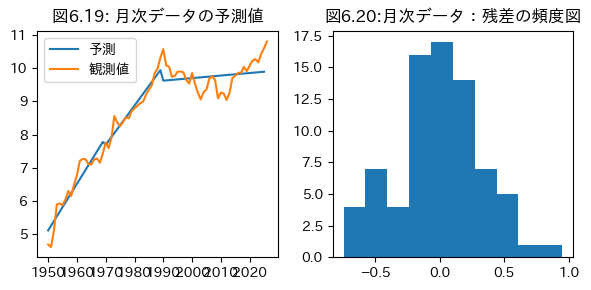

In [25]:
fig = plt.figure(figsize = (6,3))
ax1 = fig.add_subplot(1, 2, 1)
plt.title('図6.19: 月次データの予測値')
ax2 = fig.add_subplot(1, 2, 2)
plt.title('図6.20:月次データ：残差の頻度図')
ax1.plot(pred,label="予測")
ax1.plot(tsdM,label="観測値")
ax1.legend()
ax2.hist(resd)
plt.tight_layout()
#plt.savefig('6.19.jpeg',dpi=600)
plt.show()